In [4]:
# Predict United States military increase/decrease in upcoming years
# Step 1: Get Data
# Step 2: Clean Data
# Step 3: Analyze Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

# data of the military forces count
df = pd.read_csv("military_forces.csv")

# drop columns where all values are 'NaN'
cleanerData = df.dropna(axis=1, how='all') 

# drop rows where all the values are 'NaN'
cleanData = cleanerData.dropna(thresh=cleanerData.shape[1]-7)

cleanData

,Country Name,Country Code,Indicator Name,Indicator Code,1985,1989,1990,1991,1992,1993,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,Afghanistan,AFG,"Armed forces personnel, total",MS.MIL.TOTL.P1,47000.0,55000.0,58000.0,45000.0,45000.0,45000.0,...,94000.0,255745.0,306800.0,340350.0,338150.0,330650.0,308800.0,319400.0,323000.0,323000.0
2,Angola,AGO,"Armed forces personnel, total",MS.MIL.TOTL.P1,49500.0,107000.0,115000.0,150000.0,128000.0,128000.0,...,117000.0,117000.0,117000.0,117000.0,117000.0,117000.0,117000.0,117000.0,117000.0,117000.0
3,Albania,ALB,"Armed forces personnel, total",MS.MIL.TOTL.P1,40400.0,NaN,NaN,NaN,65000.0,65000.0,...,14500.0,14745.0,14745.0,14750.0,14750.0,8500.0,8500.0,8500.0,8500.0,9000.0
5,Arab World,ARB,"Armed forces personnel, total",MS.MIL.TOTL.P1,2712700.0,2885000.0,3340000.0,2422000.0,2276000.0,2276000.0,...,3480000.0,3578675.0,3598680.0,3513260.0,3542060.0,2866760.0,2881760.0,2881560.0,2781410.0,2737000.0
6,United Arab Emirates,ARE,"Armed forces personnel, total",MS.MIL.TOTL.P1,43000.0,43000.0,66000.0,66000.0,55000.0,55000.0,...,51000.0,51000.0,51000.0,51000.0,51000.0,63000.0,63000.0,63000.0,63000.0,63000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,World,WLD,"Armed forces personnel, total",MS.MIL.TOTL.P1,22209230.0,24298000.0,23918000.0,22726000.0,24533000.0,23741000.0,...,27493342.0,27924096.0,28133971.0,28020079.0,28154374.0,27206623.0,27309630.0,27437280.0,27542350.0,27414000.0
260,"Yemen, Rep.",YEM,"Armed forces personnel, total",MS.MIL.TOTL.P1,64100.0,62000.0,127000.0,127000.0,64000.0,64000.0,...,138000.0,137900.0,137900.0,137900.0,137900.0,137900.0,20000.0,20000.0,20000.0,40000.0
261,South Africa,ZAF,"Armed forces personnel, total",MS.MIL.TOTL.P1,106400.0,100000.0,85000.0,80000.0,75000.0,75000.0,...,62000.0,77153.0,77153.0,77582.0,62100.0,77150.0,82250.0,82150.0,81400.0,80000.0
262,Zambia,ZMB,"Armed forces personnel, total",MS.MIL.TOTL.P1,16200.0,17000.0,16000.0,16000.0,16000.0,16000.0,...,16000.0,16500.0,16500.0,16500.0,16500.0,16500.0,16500.0,16500.0,16500.0,16000.0


In [5]:
# Get the data regarding the United States
cleanedData = cleanData[cleanData['Country Name'].str.match('United States')]
cleanUSMilitaryData = cleanedData.drop(columns=['Country Name','Country Code', 'Indicator Name', 'Indicator Code'])
cleanUSMilitaryData

,1985,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
249,2151600.0,2240000.0,2180000.0,2120000.0,1920000.0,1820000.0,1720000.0,1635600.0,1572100.0,1533300.0,...,1540000.0,1563996.0,1569417.0,1520100.0,1492200.0,1433150.0,1381250.0,1347300.0,1348400.0,1359000.0


In [6]:
# Check if there are any nulls (just in case)
cleanUSMilitaryData.isnull().sum()

1985    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
dtype: int64

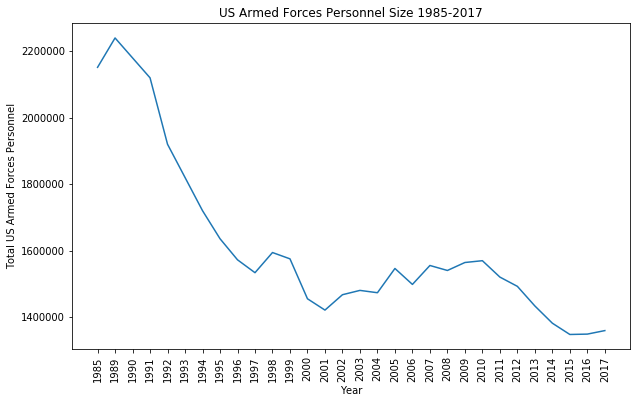

In [16]:
#data of columns (years)
x = cleanUSMilitaryData.columns 

#data of the row (military population)
y = cleanUSMilitaryData.iloc[0,:] 

#rotate x axis years so they don't overlap
plt.xticks(rotation=90) 

#plot data
plt.plot(x, y) 

# naming the x axis 
plt.xlabel('Year') 

# naming the y axis 
plt.ylabel('Total US Armed Forces Personnel') 
  
# giving a title to my graph 
plt.title('US Armed Forces Personnel Size 1985-2017') 

# function to show the plot 
plt.show() 

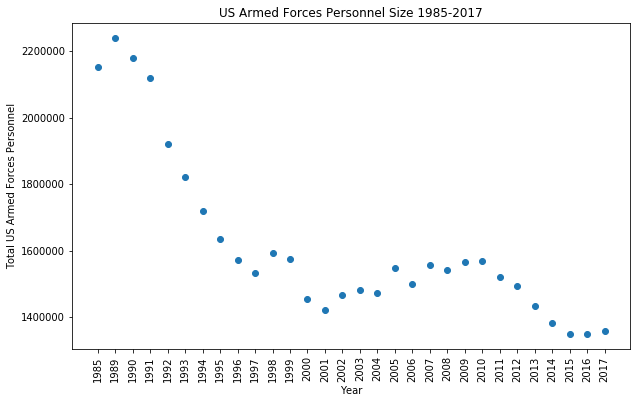

In [21]:
#Display scatter graph to try to identify if there are any clusters

#rotate x axis years so they don't overlap
plt.xticks(rotation=90) 

# naming the x axis 
plt.xlabel('Year') 

# naming the y axis 
plt.ylabel('Total US Armed Forces Personnel') 
  
# giving a title to my graph 
plt.title('US Armed Forces Personnel Size 1985-2017') 

plt.scatter(x, y)